 تحلیل تغییرات قیمت طلا، نقره، نفت و بنزین (۲۰۰۰-۲۰۲۴)

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:

symbols = {
    'Gold': 'GC=F',
    'Silver': 'SI=F',
    'Oil': 'CL=F',
    'Gasoline': 'RB=F'
}

data = {symbol: yf.download(ticker, start="2000-01-01", end="2024-12-31") for symbol, ticker in symbols.items()}


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:

def remove_outliers(df):
    mean = df['Close'].mean()
    std_dev = df['Close'].std()
    return df[np.abs(df['Close'] - mean) <= (3 * std_dev)]

cleaned_data = {symbol: remove_outliers(df) for symbol, df in data.items()}


In [22]:

annual_data = {symbol: df['Close'].resample('YE').mean() for symbol, df in cleaned_data.items()}


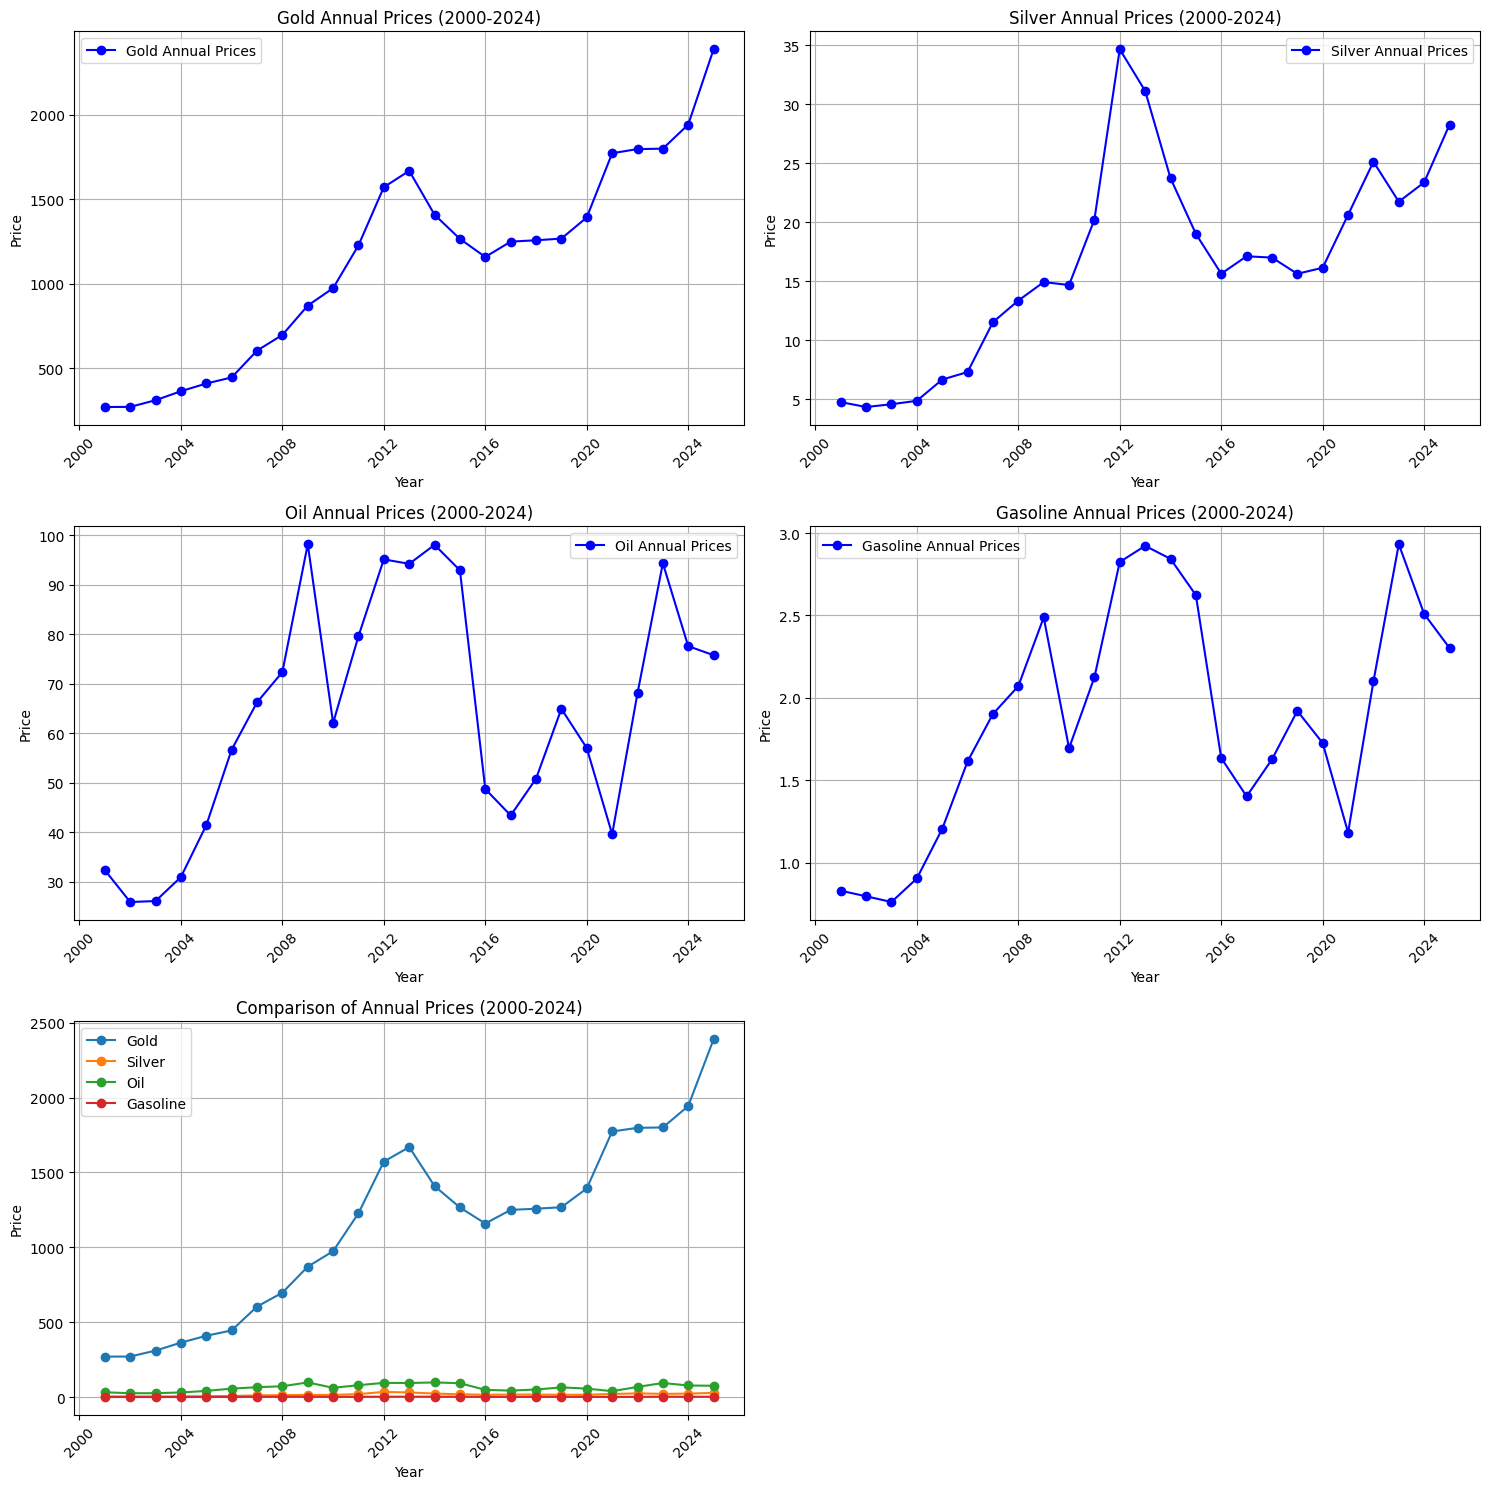

In [23]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for idx, (symbol, df) in enumerate(annual_data.items()):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    ax.plot(df.index, df.values, marker='o', label=f'{symbol} Annual Prices', color='blue')
    ax.set_title(f'{symbol} Annual Prices (2000-2024)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

combined_ax = axes[2, 0]
for symbol, df in annual_data.items():
    combined_ax.plot(df.index, df.values, marker='o', label=f'{symbol}')

combined_ax.set_title('Comparison of Annual Prices (2000-2024)')
combined_ax.set_xlabel('Year')
combined_ax.set_ylabel('Price')
combined_ax.grid(True)
combined_ax.legend()
combined_ax.tick_params(axis='x', rotation=45)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [24]:

weekly_data_2024 = {symbol: df['Close'].loc['2024'].resample('W').mean() for symbol, df in cleaned_data.items()}


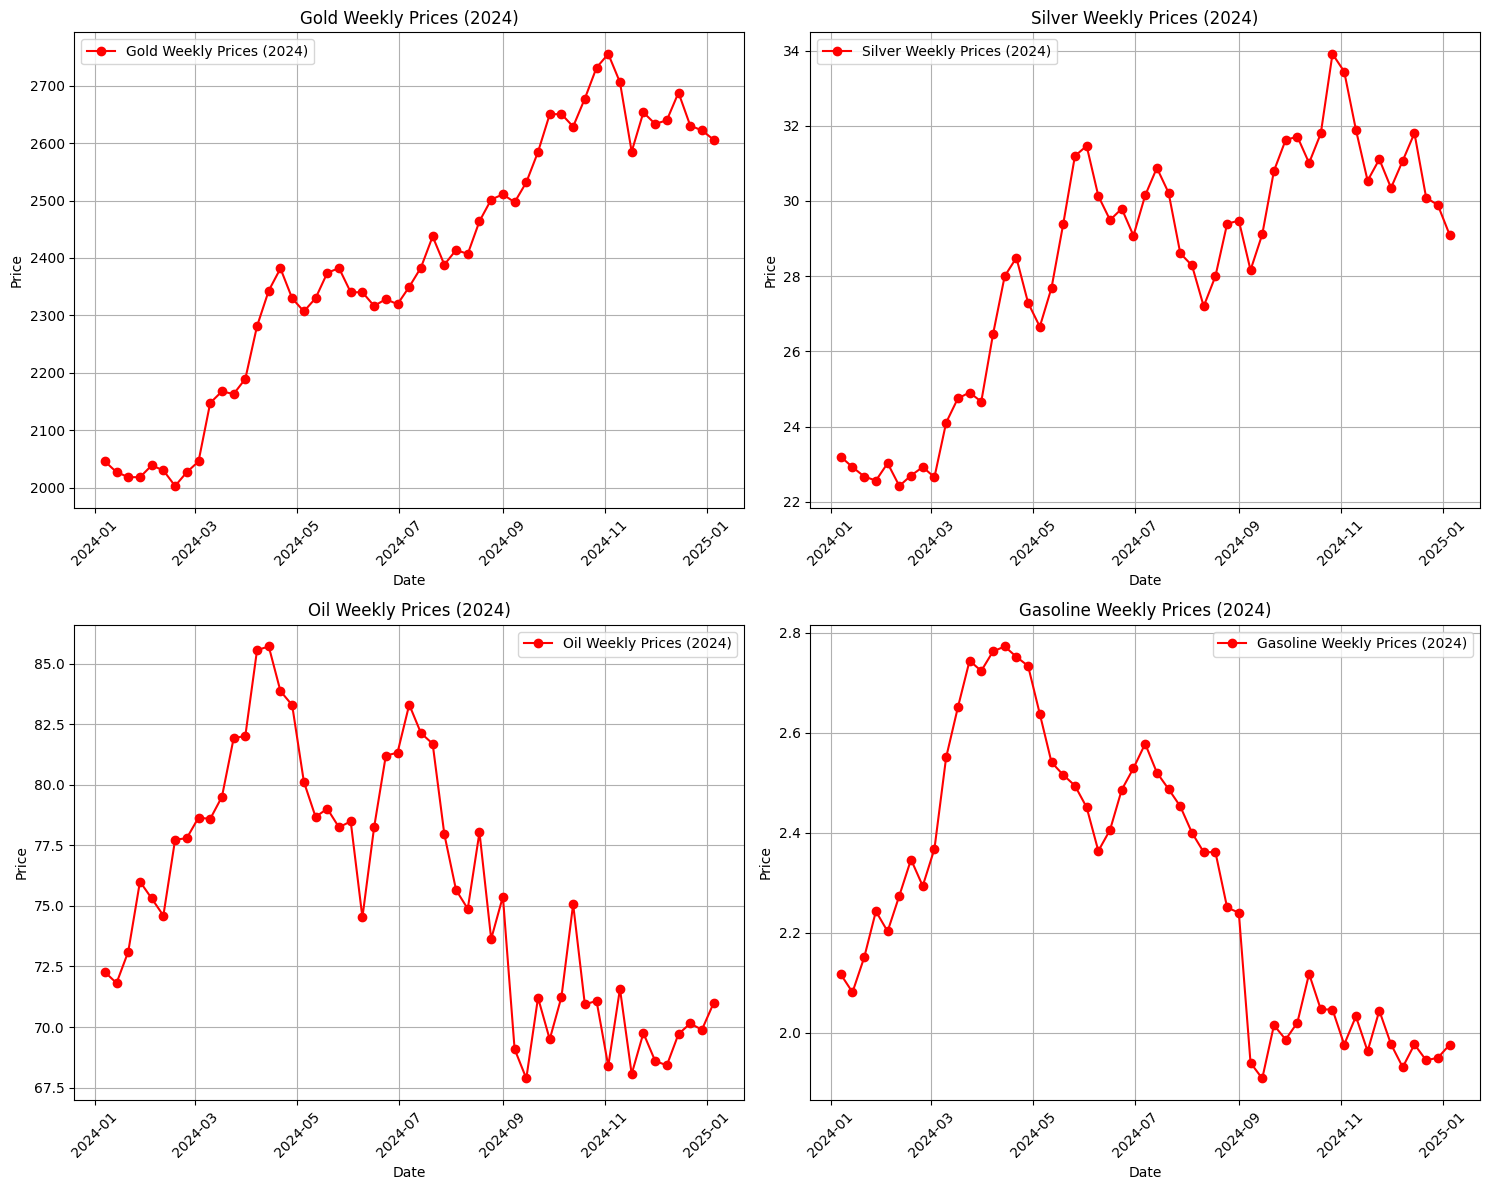

In [25]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for idx, (symbol, df) in enumerate(weekly_data_2024.items()):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    ax.plot(df.index, df.values, marker='o', label=f'{symbol} Weekly Prices (2024)', color='red')
    ax.set_title(f'{symbol} Weekly Prices (2024)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [26]:

normalized_annual_data = {}
for symbol, df in annual_data.items():
    normalized_annual_data[symbol] = df / df.iloc[0]



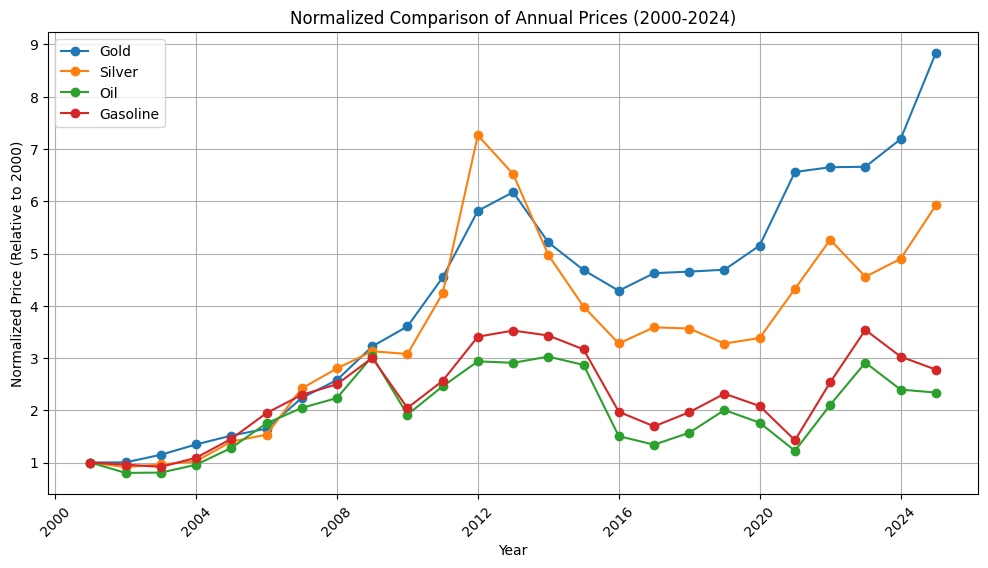

In [27]:

plt.figure(figsize=(12, 6))

for symbol, df in normalized_annual_data.items():
    plt.plot(df.index, df.values, marker='o', label=symbol)

plt.title('Normalized Comparison of Annual Prices (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Normalized Price (Relative to 2000)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()
